<a href="https://colab.research.google.com/github/PeryshkovaP/test1/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sb
import plotly.express as px

In [14]:
data = pd.read_csv('/content/heart.csv')
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


[пример](https://www.kaggle.com/code/alirezaanbari/heart-disease-classification)


## Информация об атрибутах

Age: возраст пациента [лет]

Sex: пол пациента [М: Мужчина, Ж: Женщина]

ChestPainType: тип боли в груди [TA: типичная стенокардия, ATA: атипичная стенокардия, NAP: неангинальная боль, ASY: бессимптомная] -

RestingBP: артериальное давление в состоянии покоя [мм рт. ст.] -

Cholesterol: холестерин сыворотки [мм/дл]

FastingBS: уровень сахара в крови натощак [1: если FastingBS > 120 мг/дл, 0: иначе] -

RestingECG: результаты электрокардиограммы покоя [Нормальный: нормальный, ST: наличие аномалий ST-T (инверсия зубца T и/или подъем или депрессия ST > 0,05 мВ), ГЛЖ: вероятная или определенная гипертрофия левого желудочка по шкале Estes' критерии] -

MaxHR: достигнутая максимальная частота пульса [числовое значение от 60 до 202] -

ExerciseAngina: стенокардия, вызванная физической нагрузкой [Д: Да, Н: Нет]

Oldpeak: oldpeak = ST [Числовое значение, измеренное при депрессии]

ST_Slope: наклон пикового сегмента ST при нагрузке [Вверх: вверх, Плоский: плоский, Вниз: вниз]

HeartDisease: выходной класс [1: заболевание сердца, 0: нормальное]

## Гистрограммы

Возраст и пол

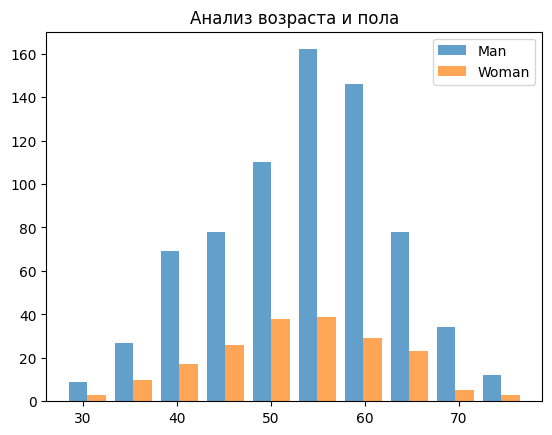

In [ ]:
male = data[data['Sex'] == 'M']
female = data[data['Sex'] == 'F']
plt.hist([male['Age'], female['Age']], alpha=0.7, label=['Man' , 'Woman'])
plt.legend()
plt.title('Анализ возраста и пола')
plt.show()

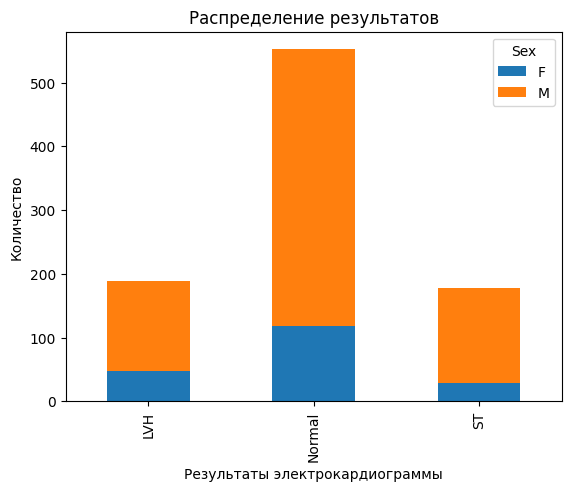

In [ ]:
group_gender_test = data.groupby(['RestingECG', 'Sex']).size().unstack(fill_value=0)
group_gender_test.plot(kind='bar', stacked=True)
plt.title('Распределение результатов')
plt.xlabel('Результаты электрокардиограммы')
plt.ylabel('Количество')
plt.show()

## Круговая диаграмма

Круговая диаграмма распределение: по ChestPainType

In [52]:
# Находим уникальные значения для ChestPainType
ChestPainType_label = data['ChestPainType'].unique()
ChestPainType_label

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [53]:
# Выясняем количество каждого из аргументов и сопоставляем с уникальными значениями
data.groupby(['ChestPainType']).size()

ChestPainType
ASY    496
ATA    173
NAP    203
TA      46
dtype: int64

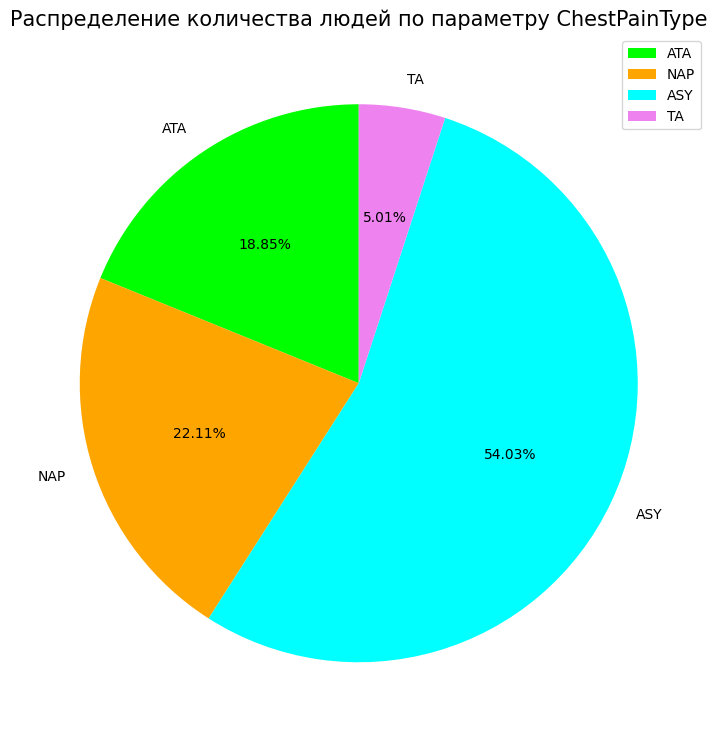

In [87]:
ChestPainType_label = data['ChestPainType'].unique()
ChestPainType_size = [173, 203, 496, 46]
ChestPainType_explode = (0, 0, 0, 0)

plt.figure(figsize=(9,11))
plt.pie( ChestPainType_size , explode=ChestPainType_explode , labels=ChestPainType_label,
        autopct='%1.2f%%' , startangle=90, colors= ['lime','orange', 'cyan', 'violet'])
plt.title("Распределение количества людей по параметру ChestPainType",fontsize=15,color='black')
plt.legend()

Разделение RestingBP на типы

In [79]:
data2 = data.drop(data[(data['RestingBP'] == 0)].index)

In [80]:
Low_RestingBP = data2[data2['RestingBP'] <= 100 ]
Normal_RestingBP = data2[(data2['RestingBP'] > 100) & (data2['RestingBP']<= 130) ]
High_RestingBP = data2[data2['RestingBP'] > 130]

print(f'Low :\n{Low_RestingBP.shape}\n')
print(f'Normal :\n{Normal_RestingBP.shape}\n')
print(f'High :\n{High_RestingBP.shape}\n')

Low :
(27, 12)

Normal :
(465, 12)

High :
(425, 12)



Круговая диаграмма распределение: по RestingBP

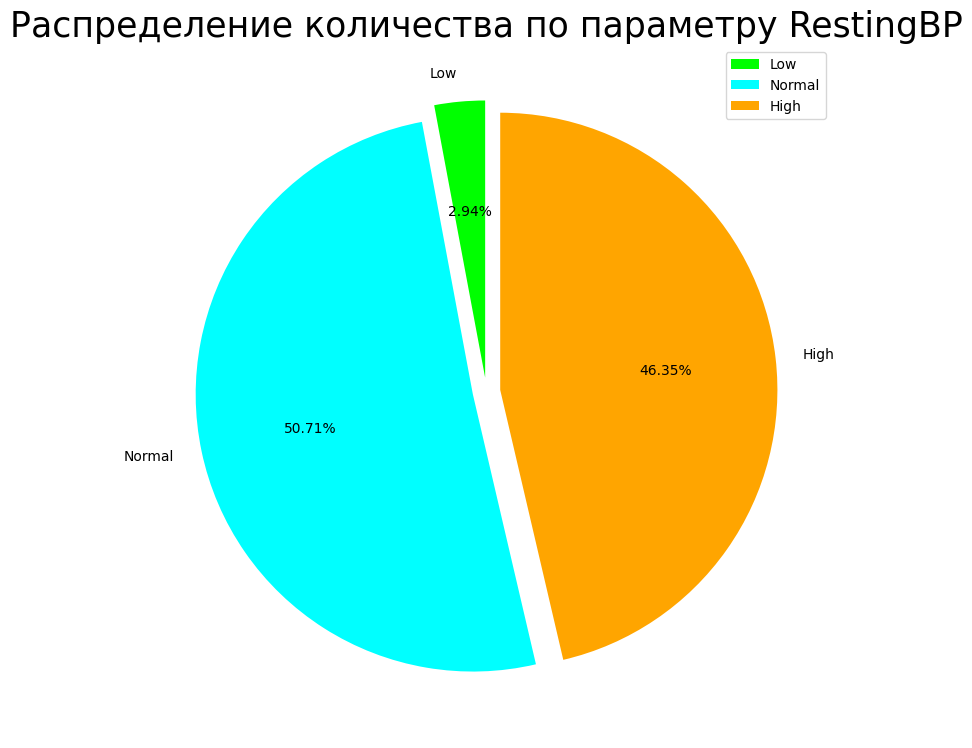

In [88]:
BP_range_label = ['Low', 'Normal', 'High']
BP_range_size = [27, 465, 425]
BP_range_explode = (0.05, 0.05, 0.05)

plt.figure(figsize=(13, 9))
plt.pie( BP_range_size , explode=BP_range_explode , labels=BP_range_label,
        autopct='%1.2f%%' , startangle=90, colors=['lime', 'cyan','orange'])
plt.title("Распределение количества по параметру RestingBP",fontsize=25,color='black')
plt.legend()

## Ящик с усами

HeartDisease: выходной класс [1: заболевание сердца, 0: нормальное]

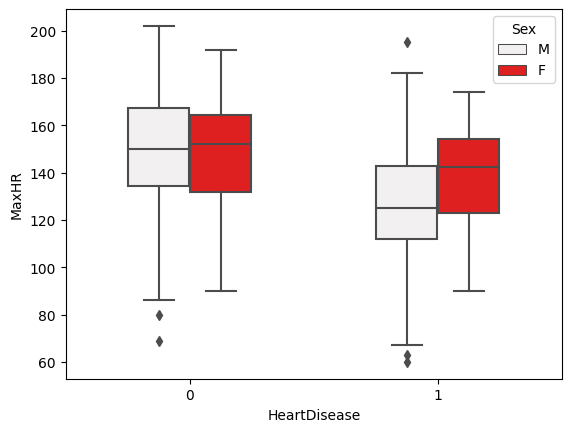

In [56]:
# Создает ящик с усами на основе даннных HeartDisease, MaxHR и Sex
sb.boxplot(data, x='HeartDisease', y='MaxHR', hue='Sex', color='red', width=0.5)
plt.show()

## Функция визуализации распределения swarmplot()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 20.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 15.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 32.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


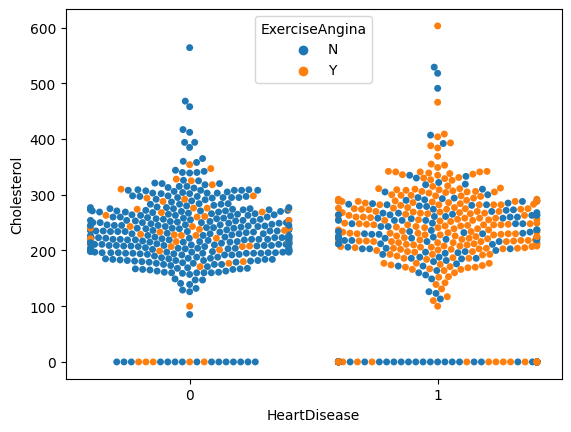

In [59]:
sb.swarmplot(data, x='HeartDisease', y='Cholesterol', hue='ExerciseAngina')
plt.show()

## Функция визуализации scatter()

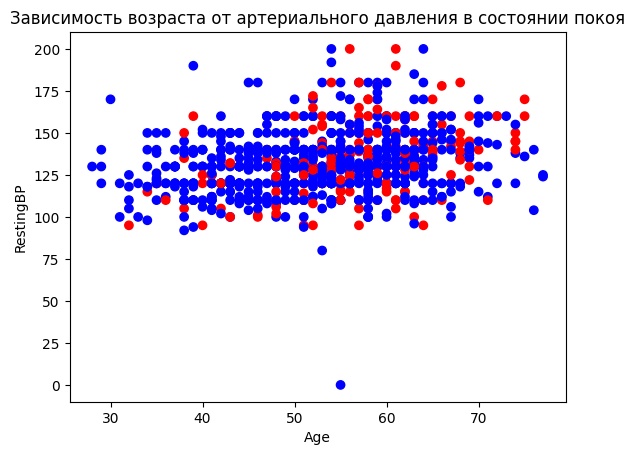

In [60]:
plt.scatter(data['Age'], data['RestingBP'], c=data['FastingBS'].map({0: 'blue', 1: 'Red'}))

plt.xlabel('Age')
plt.ylabel('RestingBP')
plt.title('Зависимость возраста от артериального давления в состоянии покоя')

plt.show()

In [78]:
data.groupby(['HeartDisease']).size()

HeartDisease
0    410
1    508
dtype: int64

In [77]:
figure = px.scatter(data_frame=data, x='RestingBP', y='Age', color=data['HeartDisease'].map({0: 'blue', 1: 'Red'}), symbol='FastingBS', size='RestingBP',
)

figure.update_traces(marker=dict(size=10))

figure.update_layout(template='simple_white')

figure.show()